<a href="https://colab.research.google.com/github/Sophia-JingMing/mit-6.86x/blob/feature/homeworks/homework%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages and libraries

In [ ]:
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt

Assume:
-There exits $\theta^{*}$ such that $\frac {y^{i}(\theta^{*}x^{i})} {\left\|\theta^{*}\right\|} \geq \gamma $ for all $i = 1, ...n $ and some $\gamma > 0$
- All the examples are bounded $\left\|x^{i}\right\| \leq R, i = 1, ..., n$

Then the number $k$ of updates mabe by the perceptron algorithm is bounded by $\frac {R^{2}}{\gamma^{2}}$.

Note that the first condition implies that the data is linearly separable.

Based on this theorem, what are the factors that constitute the bound on the number of mistakes made by the algorithm?


A. Iteration order

B. Maximum margin between positive and negative data points

C. Maximum norm of data points

D. Average norm of data points

# 1. Perceptron Mistakes
In this problem, we will investigate perceptron algorithm with different iteration ordering.

Consider applying the perceptron algorithm through the origin based on a small training set containing three points:


x|y
---|---
x(1)  =[-1,-1]|	 y(1) =1  
x(2)  =[1,0]|	 y(2) =-1  
x(3)  =[-1, 1.5]|	 y(3) =1

Given that the algorithm starts with  $\theta _{0}$=0 , the first point that the algorithm sees is always considered a mistake. The algorithm starts with some data point and then cycles through the data (in order) until it makes no further mistakes.  


(a)  
4 points possible (graded)  
How many mistakes does the algorithm make until convergence if the algorithm starts with data point $x_{1}$? How many mistakes does the algorithm make if it starts with data point $x_{2}$)?  

Also provide the progression of the separating plane as the algorithm cycles in the following format: [[$\theta_{1}1$, $\theta_{1}2$],…,[$\theta_{N}$)1, $\theta_{N}$2]], where the superscript denotes different theta as the separating plane progresses. For example, if $\theta$ progress from [0, 0] (initialization) to [1, 2] to [3, −2], you should enter [[1, 2],[3, −2]]  



In [ ]:
def perceptron (x, y, theta = np.zeros(2),theta_0 = 0, start = 0) :
    '''return the number of mistakes if start with x[start] until convergence'''
    count = 0
    theta_list = []
    while True:
        converged = True 
        for i in chain (range(start, x.shape[0]), range(start)): 
            if y[i] * (theta @ x[i]+ theta_0) <=0: 
                count +=1
                theta += y[i] * x[i]
                theta_0 += y[i]
                theta_list.append(theta)
                converged = False 
        if converged:
            break
    return theta_list,  count 
x = np.array([[-1, -1], [1, 0], [-1, 1.5]])
y = np.array([1, -1, 1])
print(perceptron(x, y, theta = np.zeros(2),theta_0 = 0, start = 0))
perceptron(x, y, theta = np.zeros(2),theta_0 = 0, start = 1)

([array([-2., -1.]), array([-2., -1.])], 2)


([array([-2. ,  1.5]), array([-2. ,  1.5])], 2)

(c)  
4 points possible (graded)  
Now assume that x(3)=[−1,10]. How many mistakes does the algorithm make until convergence if cycling starts with data point x(1)?  

Also provide the progression of the separating plane as the algorithm cycles in the following format: [[θ(1)1,θ(1)2],…,[θ(N)1,θ(N)2]], where the superscript denotes different theta as the separating plane progresses.  


In [ ]:
x2 = np.array([[-1,-1], [1,0], [-1, 10]])
y2 = np.array([1, -1, 1])
print(perceptron(x2, y2))
print(perceptron(x2, y2, start=1))

([array([-5.,  7.]), array([-5.,  7.]), array([-5.,  7.]), array([-5.,  7.]), array([-5.,  7.])], 5)
([array([-6.,  6.])], 1)


(d)  
1 point possible (graded)  
For a fixed iteration order, what are the factors that affect the number of mistakes made by the algorithm between part (a) and part (c)?  

Note: Only choose factors that were changed between part (a) and part (c), not all factors that can affect the number of mistakes  


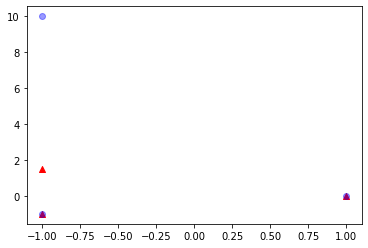

In [ ]:
plt.scatter(x[:, 0], x[:, 1], color = 'r', marker = '^')
plt.scatter(x2[:, 0], x2[:, 1], color = 'b', alpha = .4)

# 2. Perceptron Performance


(a)  
2 points possible (graded)  
The following table shows a data set and the number of times each point is misclassified during a run of the perceptron algorithm (with offset θ0). θ and θ0 are initialized to zero.  

i	x(i)	y(i)	times misclassified  
1	[-4, 2]	+1	1  
2	[-2, 1]	+1	0  
3	[-1, -1]	-1	2  
4	[2, 2]	-1	1  
5	[1, -2]	-1	0  
Write down the state of θ and θ0 after this run has completed (note, the algorithm may not yet have converged). Enter θ as a list [θ1,θ2] and θ0 as a single number in the following boxes.  


In [ ]:
def misclassify(x, y, theta):
    """
    Decision boundary: wx(i) = 0
    w: if None, initialize to 0
    """
    
    theta_0 = 0
    mistakes = []
    while True:
        converged = True
        for i in range (x.shape[0]):
            if y[i] * (theta @ x[i] + theta_0) <= 0:
                theta += y[i] * x[i]
                theta_0 += y[i]
                mistakes.append(theta)
                converged = False 
        if converged :
            break 
    return mistakes, theta_0
x3 = np.array([[-4, 2], [-2, 1], [-1, -1], [2, 2], [1, -2]])
y3 = np.array([1, 1, -1, -1, -1])
mistakes, weights = misclassify(x3, y3, theta = np.zeros (2))
print(mistakes)
print(weights)

[array([-3.,  3.]), array([-3.,  3.]), array([-3.,  3.]), array([-3.,  3.]), array([-3.,  3.])]
-3


(b)  
2 points possible (graded)  
Provide one example of a different initialization of θ such that the perceptron algorithm with this initialization would not produce any mistakes during a run through the data.  


In [ ]:
interval = range(-10, 11)
theta_try
for i in interval:
    for j in range(len(interval)):
        theta_try.append(np.array([i, interval[j]]))
theta_try

def idea_init(theta_list):
    for i in range(len(theta_list)):
        current_theta = theta_list[i]
        if y[i] * (current_theta @ x[i]) <= 0:
            continue
        return current_theta
idea_init(theta_try)

array([-10, -10])